# uSEIR LL- ch2 fit 

uSEIR with beta, gamma parameters instead of R0, R1

In this NB we show that the fit to a uSEIR or uSEIR-quenched has some degerancies in the (beta, TR) parameters and also in the (T0, beta, TR) parameters. 

Date:  27 May 2020
Author:   J.A. Hernando

In [6]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Fri Jun  5 11:43:36 2020


In [7]:
import numpy as np
import pandas as pd
import matplotlib

In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [9]:
## mathplotlib configuration
fontsize = 12
plt.rcParams["figure.figsize"] = 6, 5
plt.rcParams["font.size"     ] = fontsize

#font = {'family': 'serif',
#        'color':  'black',
#        'weight': 'bold',
#        'size': fontsize,
#        }

plt.style.context('seaborn-colorblind');


In [10]:
import scipy.stats  as stats

from scipy.integrate import odeint
import scipy.integrate as spi
from scipy.interpolate import interp1d

In [11]:
import c19.useir            as us
import c19.useir_ana        as usa
import c19.kfmysir          as kf
import c19.cfit             as cfit

In [12]:
import warnings
warnings.filterwarnings("ignore")

## uSEIR

### generation

In [13]:
Beta, TR, TI, N, PhiM = 3./5., 5., 5.5, 1e6, 0.1
R0  = Beta * TR
print('R0, TR, TI ', R0, TR, TI)

R0, TR, TI  3.0 5.0 5.5


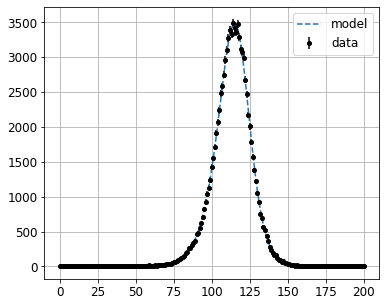

In [19]:
ufun = us._useirext
pars = (Beta, TR, TI, N, PhiM)
times, xdata = us.rvs(pars, ufun = ufun)

usa.plot_fit_data(xdata, pars, ufun = ufun)

### test residuals

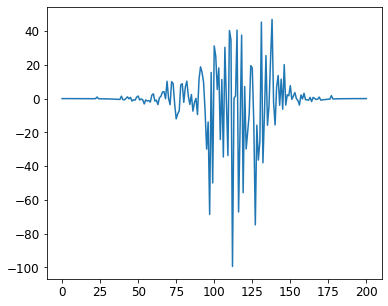

In [15]:
fres  = us.res(xdata, ufun = ufun, sqr = False)
plt.plot(xs, fres(pars));

### chi2 fit

true (0.6, 5.0, 5.5, 1000000.0, 0.1) , guess  (0.6, 5.0, 5.5, 1000000.0, 0.1) , best  [6.06709230e-01 4.92225618e+00 5.50000000e+00 1.00000000e+06
 1.00000000e-01]
f best  96293.8904958861 , f true  102792.29325585061 , f delta  6498.40275996452


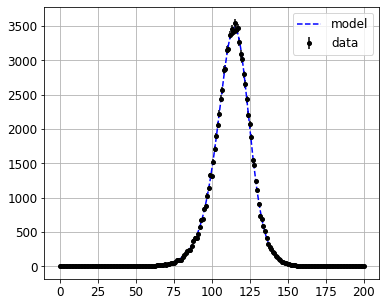

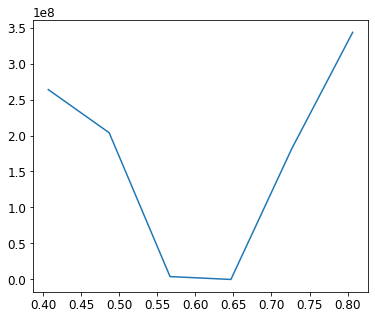

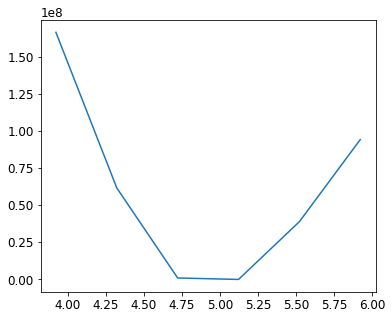

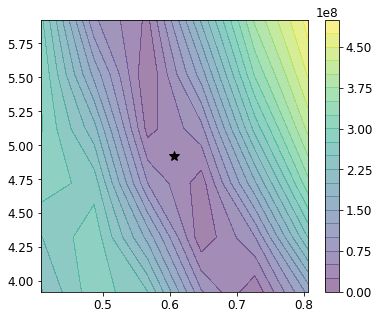

In [10]:
fchi2 = us.res(xdata, ufun = ufun)
mask = (True, True, False, False, False)
parshat = usa.fit_ana(fchi2, pars, mask = mask)
usa.plot_fit_data(xdata, parshat, ufun = ufun)
usa.plot_fit_scan(parshat, fchi2, 0.2, 1.)

[1.0e+00 7.0e+00 5.5e+00 1.0e+06 1.0e-01]
mle: warning
true (0.6, 5.0, 5.5, 1000000.0, 0.1) , guess  [1.0e+00 7.0e+00 5.5e+00 1.0e+06 1.0e-01] , best  [6.08605820e-01 5.20886850e+00 5.94128141e+00 7.55450847e+05
 1.30924848e-01]
f best  100879.61935455976 , f true  102792.29325585061 , f delta  1912.673901290851


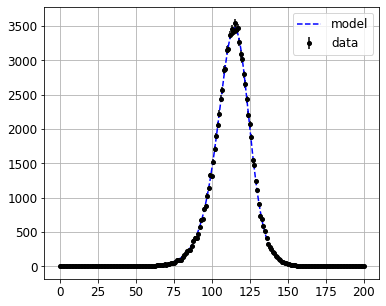

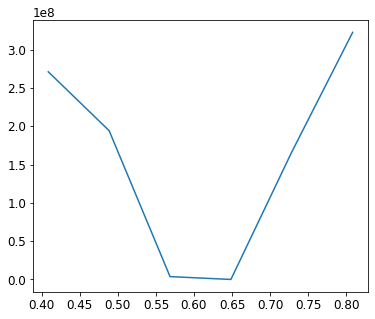

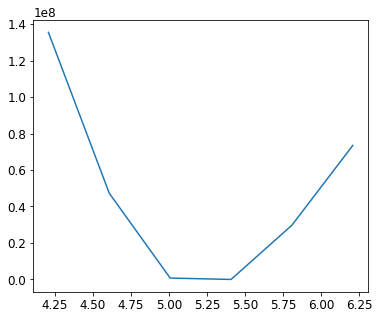

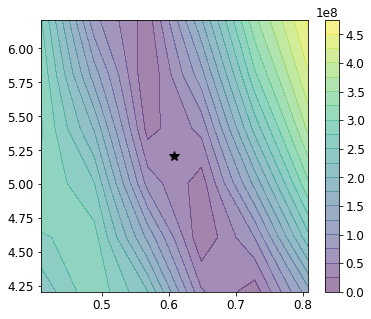

In [15]:
xpars = usa.fit_setpars(pars, (1, 7), mask)
print(xpars)
parshat = usa.fit_ana(fchi2, xpars, pars)
usa.plot_fit_data(xdata, parshat, ufun = ufun)
usa.plot_fit_scan(parshat, fchi2, 0.2, 1.)

### MLL fit

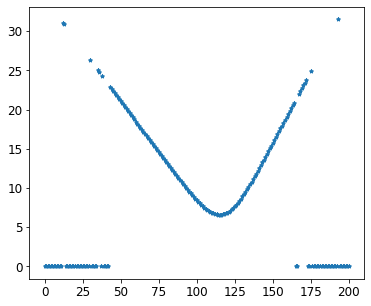

In [16]:
fmle  = us.mll(xdata, ufun = ufun)

lls = fmle(pars)
lls[ys <= 0] = 0.
lls[ys >  0] = lls[ys >0] /ys[ys >0]
plt.plot(xs, lls, ls = '', marker = '*', ms = 4);

true (0.6, 5.0, 5.5, 1000000.0, 0.1) , guess  (0.6, 5.0, 5.5, 1000000.0, 0.1) , best  [5.99836878e-01 5.00612661e+00 5.50000000e+00 1.00000000e+06
 1.00000000e-01]
f best  738760.3865028137 , f true  738762.3133600377 , f delta  1.9268572240835056


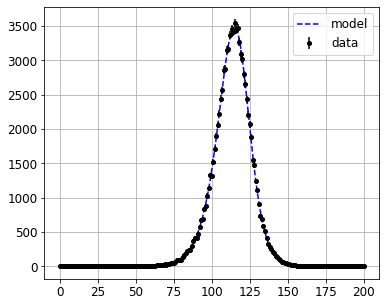

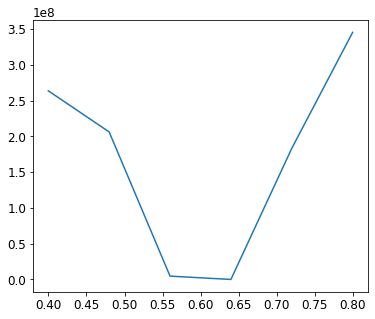

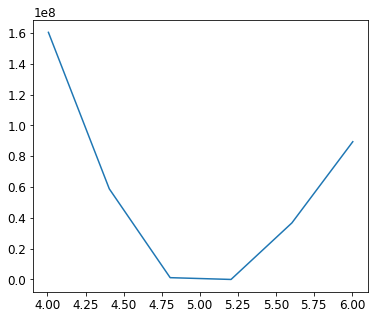

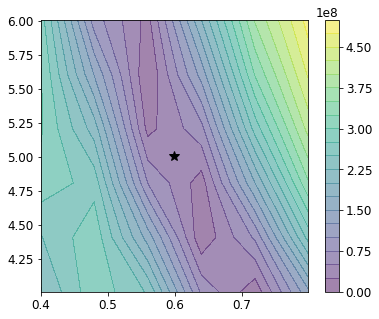

In [19]:
parshat = usa.fit_ana(fmle, pars, mask = mask)
usa.plot_fit_data(xdata, parshat, ufun = ufun)
usa.plot_fit_scan(parshat, fchi2, 0.2, 1.)

true (0.6, 5.0, 5.5, 1000000.0, 0.1) , guess  [8.0e-01 6.0e+00 5.5e+00 1.0e+06 1.0e-01] , best  [5.99835048e-01 5.00614852e+00 5.50000000e+00 1.00000000e+06
 1.00000000e-01]
f best  738760.3865029243 , f true  738762.3133600377 , f delta  1.9268571134889498


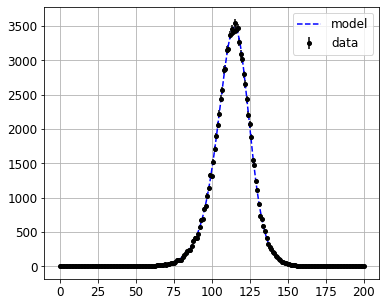

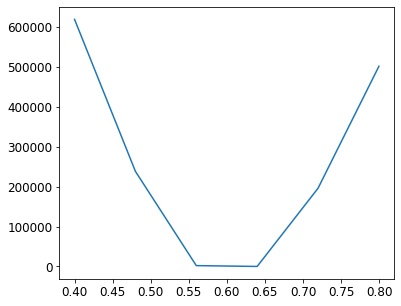

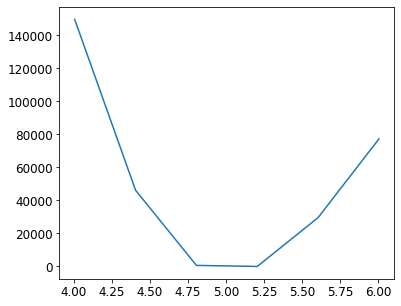

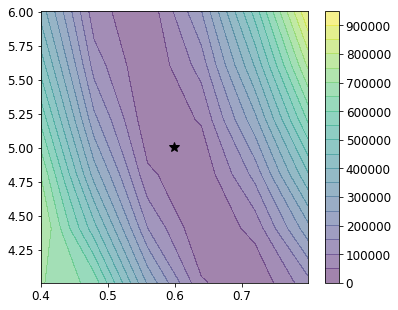

In [23]:
xpars   = usa.fit_setpars(pars, (0.8, 6.), mask)
parshat = usa.fit_ana(fmle, xpars, pars, mask)
usa.plot_fit_data(xdata, parshat, ufun = ufun)
usa.plot_fit_scan(parshat, fmle, 0.2, 1.)

## uSEIR quenched

R0, R1, TR, TI  3.0 0.8 5.0 5.5


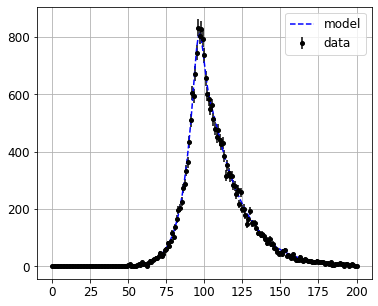

In [26]:
Beta, Gamma, TR, TI, N, PhiM, S1 = 3./5., 0.8/5., 5., 5.5, 1e6, 0.1, 0.1
R0, R1  = Beta * TR, Gamma * TR
print('R0, R1, TR, TI ', R0, R1, TR, TI)

ufun = us._useirvarext

pars = (Beta, Gamma, TR  , TI   , N    , PhiM , S1)
mask = (True, True , True, False, False, False, False) 
times, xdata = us.rvs(pars, ufun = ufun)

usa.plot_fit_data(xdata, pars, ufun= ufun)

### Chi2

true (0.6, 0.16, 5.0, 5.5, 1000000.0, 0.1, 0.1) , guess  (0.6, 0.16, 5.0, 5.5, 1000000.0, 0.1, 0.1) , best  [5.80872009e-01 1.48629219e-01 5.24632908e+00 5.50000000e+00
 1.00000000e+06 1.00000000e-01 1.00000000e-01]
f best  23509.42459532582 , f true  27333.378799004862 , f delta  3823.954203679041


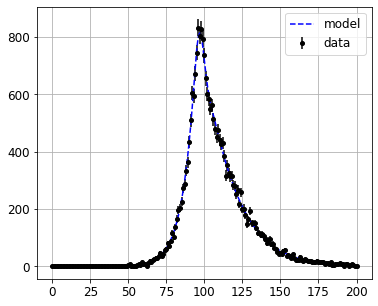

In [28]:
fchi2   = us.res(xdata, ufun = ufun)
xpars   = pars 
parshat = usa.fit_ana(fchi2, xpars, pars, mask)
usa.plot_fit_data(xdata, parshat, ufun = ufun)

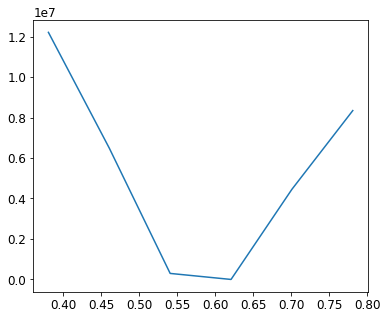

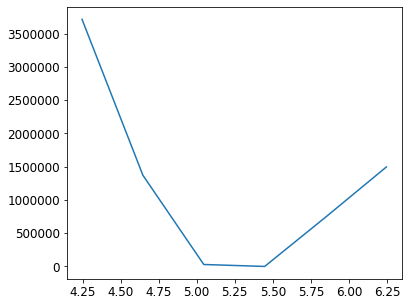

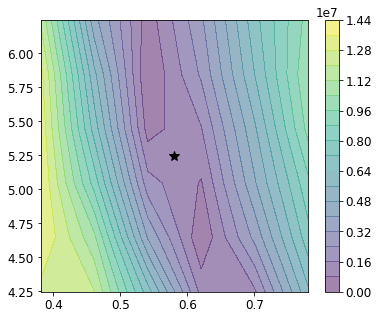

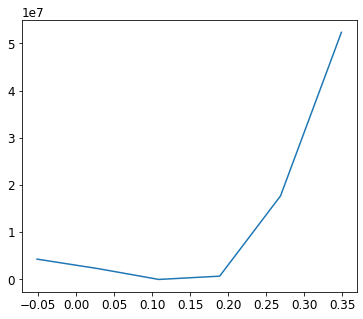

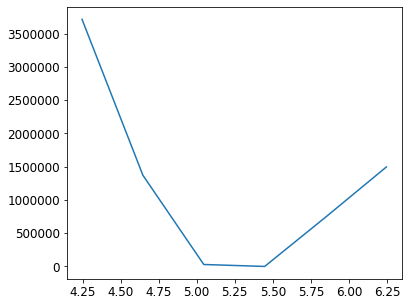

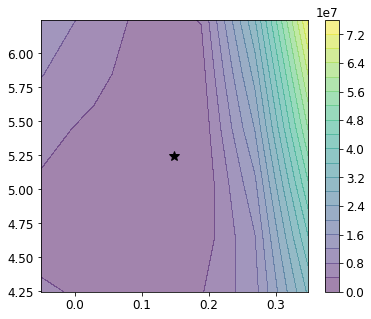

In [29]:
usa.plot_fit_scan(parshat, fchi2, 0.2, 1., index0 = 0, index1 = 2)
usa.plot_fit_scan(parshat, fchi2, 0.2, 1., index0 = 1, index1 = 2)

### MLE

true (0.6, 0.16, 5.0, 5.5, 1000000.0, 0.1, 0.1) , guess  [6.0e-01 1.6e-01 5.0e+00 5.5e+00 1.0e+06 1.0e-01 1.0e-01] , best  [5.71218496e-01 1.43981847e-01 5.29385992e+00 5.50000000e+00
 1.00000000e+06 1.00000000e-01 1.00000000e-01]
f best  209538.75636880717 , f true  209548.66840917154 , f delta  9.91204036437557


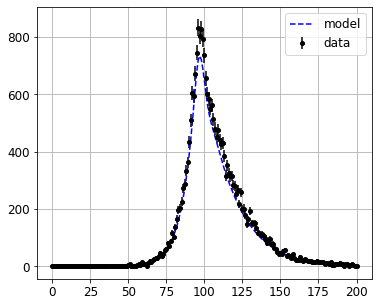

In [32]:
fmle   = us.mll(xdata, ufun = ufun)
xpars  = usa.fit_setpars(pars, (Beta, Gamma, TR), mask)
parshat = usa.fit_ana(fmle, xpars, pars, mask)
usa.plot_fit_data(xdata, parshat, ufun = ufun)

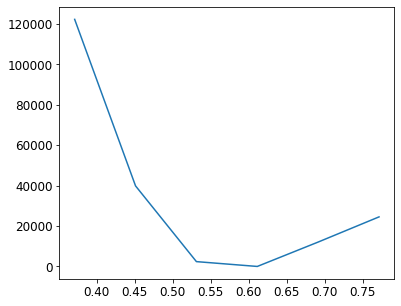

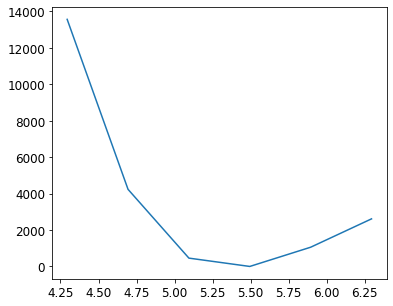

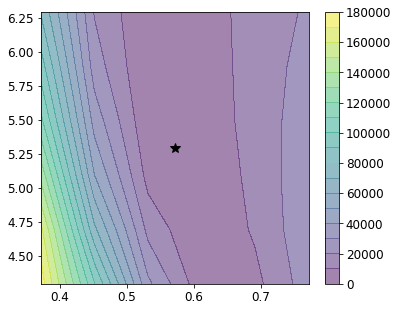

In [33]:
usa.plot_fit_scan(parshat, fmle, 0.2, 1., index0 = 0, index1 = 2)

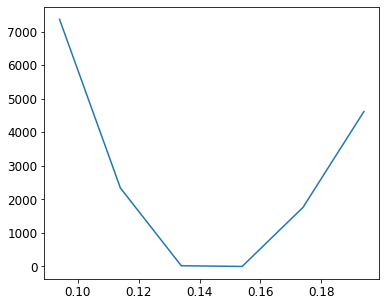

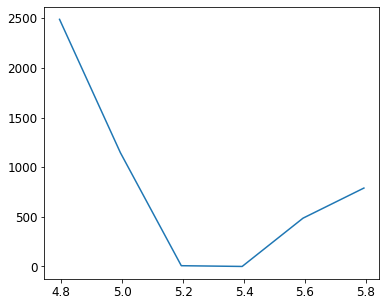

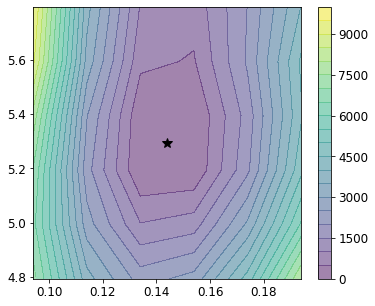

In [41]:
usa.plot_fit_scan(parshat, fmle, 0.05, 0.5, index0 = 1, index1 = 2)

## uSEIR with t0

T0, R0, R1, TR, TI  15 3.0 5.0 5.5


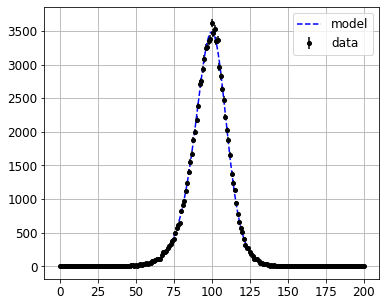

In [47]:
T0   = 15
Beta, Gamma, TR, TI, N, PhiM = 3./5., 0.8/5., 5., 5.5, 1e6, 0.1
R0  = Beta * TR
print('T0, R0, R1, TR, TI ', T0, R0, TR, TI)

ufun = lambda pars : us._t0(pars, us._useirext)

pars = (T0  , Beta, TR  , TI   , N    , PhiM)
mask = (True, True, True, False, False, False) 
times, xdata = us.rvs(pars, ufun = ufun)

usa.plot_fit_data(xdata, pars, ufun= ufun)

#xpars          = usa.fit_setpars(pars, (0, Beta, TR), mask)
#xtimes, xxdata = us.rvs(xpars, ufun = ufun)
#usa.plot_fit_data(xxdata, xpars, ufun= ufun)

### Chi2 -fit

true (15, 0.6, 5.0, 5.5, 1000000.0, 0.1) , guess  [1.5e+01 6.0e-01 5.0e+00 5.5e+00 1.0e+06 1.0e-01] , best  [1.51890581e+01 5.91256450e-01 5.11170755e+00 5.50000000e+00
 1.00000000e+06 1.00000000e-01]
f best  135356.49529174395 , f true  137716.86523173272 , f delta  2360.36993998877


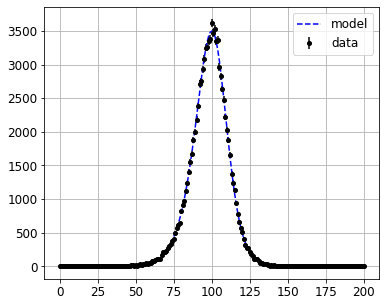

In [48]:
fchi2 = us.res(xdata, ufun = ufun)
xpars = usa.fit_setpars(pars, (T0, Beta, TR), mask)
parshat = usa.fit_ana(fchi2, xpars, pars, mask)
usa.plot_fit_data(xdata, parshat, ufun = ufun)
#plot_scan(parshat, fchi2, r0s, tms, index0 = 1, index1 = 3)

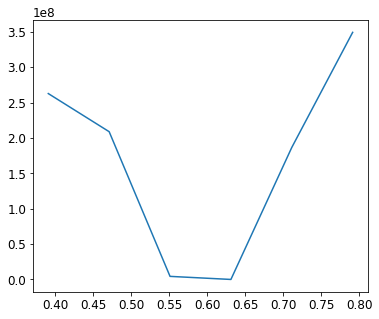

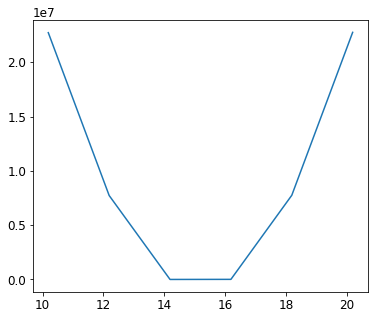

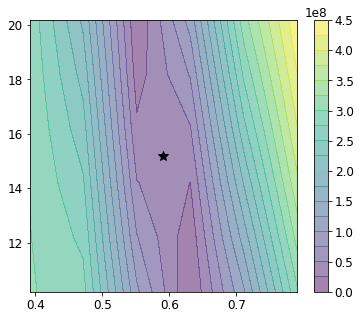

In [50]:
usa.plot_fit_scan(parshat, fchi2, 0.2, 5., index0 = 1, index1 = 0)

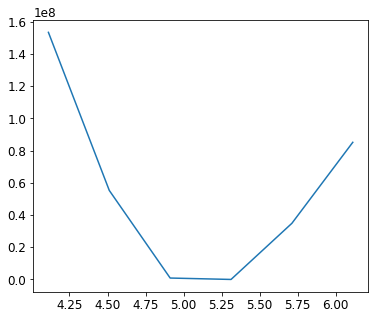

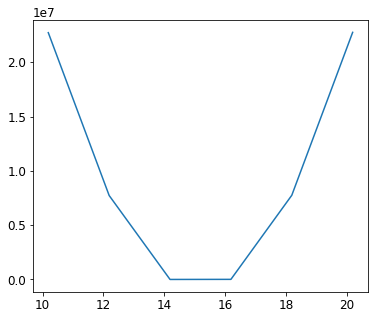

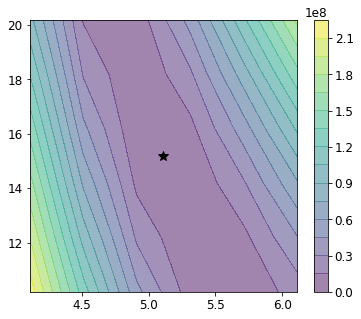

In [54]:
usa.plot_fit_scan(parshat, fchi2, 1., 5., index0 = 2, index1 = 0)

#### Test chi2 change T0

true (15, 0.6, 5.0, 5.5, 1000000.0, 0.1) , guess  [5.0e+00 6.0e-01 5.0e+00 5.5e+00 1.0e+06 1.0e-01] , best  [4.01167572e+00 1.51256487e+00 1.25158471e+00 5.50000000e+00
 1.00000000e+06 1.00000000e-01]
f best  431790.1662122609 , f true  137716.86523173272 , f delta  -294073.3009805282


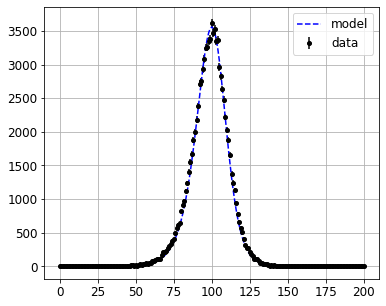

In [57]:
chi2 = us.res(xdata, ufun = ufun)
xpars = usa.fit_setpars(pars, (5, Beta, TR), mask)
parshat = usa.fit_ana(fchi2, xpars, pars, mask)
usa.plot_fit_data(xdata, parshat, ufun = ufun)

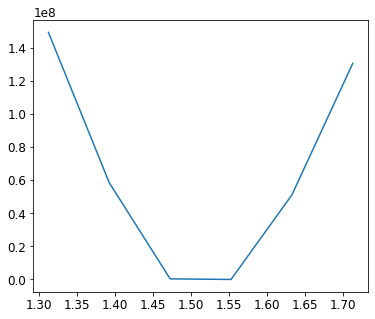

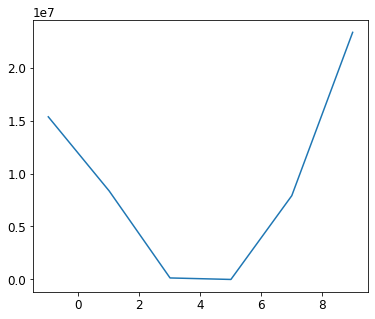

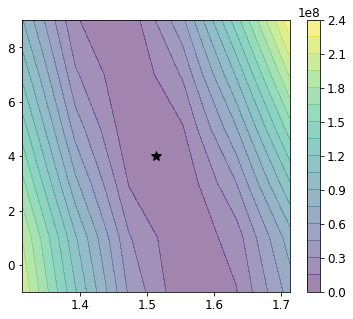

In [58]:
usa.plot_fit_scan(parshat, fchi2, 0.2, 5., index0 = 1, index1 = 0)

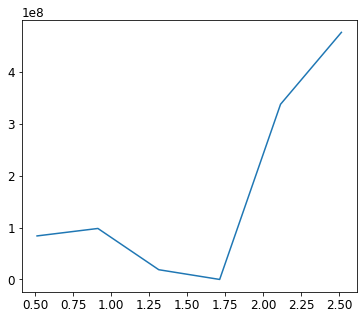

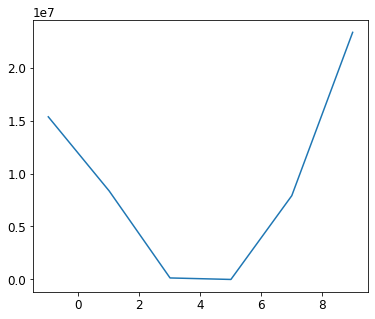

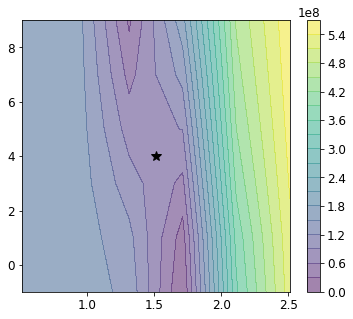

In [59]:
usa.plot_fit_scan(parshat, fchi2, 1., 5., index0 = 1, index1 = 0)

This example shows how a T0 shift can be mask by a Beta, TR change

### MLE

true (15, 0.6, 5.0, 5.5, 1000000.0, 0.1) , guess  [1.5e+01 6.0e-01 5.0e+00 5.5e+00 1.0e+06 1.0e-01] , best  [1.56967659e+01 5.81852031e-01 5.24082356e+00 5.50000000e+00
 1.00000000e+06 1.00000000e-01]
f best  737789.0687231593 , f true  737791.9940138247 , f delta  2.9252906654728577


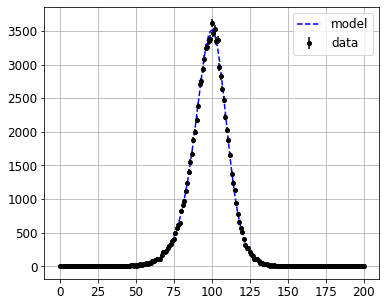

In [62]:
fmle    = us.mll(xdata, ufun = ufun)
xpars   = usa.fit_setpars(pars, (T0, Beta, TR), mask)
parshat = usa.fit_ana(fmle, xpars, pars, mask)
usa.plot_fit_data(xdata, parshat, ufun = ufun)
#plot_scan(parshat, fmle, r0s, tms, index0 = 1, index1 = 3)

true (15, 0.6, 5.0, 5.5, 1000000.0, 0.1) , guess  [2.0e+01 6.0e-01 5.0e+00 5.5e+00 1.0e+06 1.0e-01] , best  [2.03647124e+01 4.24768974e-01 8.40008150e+00 5.50000000e+00
 1.00000000e+06 1.00000000e-01]
f best  737807.1889249941 , f true  737791.9940138247 , f delta  -15.194911169353873


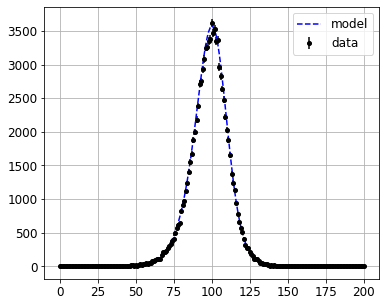

In [66]:
fmle    = us.mll(xdata, ufun = ufun)
xpars   = usa.fit_setpars(pars, (T0 + 5, Beta, TR), mask)
parshat = usa.fit_ana(fmle, xpars, pars, mask)
usa.plot_fit_data(xdata, parshat, ufun = ufun)
#plot_scan(parshat, fmle, r0s, tms, index0 = 1, index1 = 3)

## uSEIR quenched with t0

In [5]:
T0   = 15
Beta, Gamma, TR, TI, N, PhiM = 3.5/5., 0.8/5., 5., 5.5, 1e6, 0.1
R0  = Beta * TR
print('T0, R0, R1, TR, TI ', T0, R0, R1, TR, TI)

ufun = lambda pars : us._t0(pars, us._useirvarext)

pars = (T0  , Beta, Gamma, TR   , TI   , N    , PhiM , S1)
mask = (True, True, True , True , False, False, False, False) 
times, xdata = us.rvs(pars, ufun = ufun)

usa.plot_fit_data(xdata, pars, ufun= ufun)

xpars          = usa.fit_setpars(pars, (0, Beta, Gamma, TR), mask)
xtimes, xxdata = us.rvs(xpars, ufun = ufun)
usa.plot_fit_data(xxdata, xpars, ufun= ufun)

T0, R0, R1, TR, TI  15 6.5 0.7 3.5 5.5


NameError: name 'S1' is not defined

### Fit whit ch2

true (15, 0.6, 0.16, 5.0, 5.5, 1000000.0, 0.1, 0.05) , guess  [1.5e+01 6.0e-01 1.6e-01 5.0e+00 5.5e+00 1.0e+06 1.0e-01 5.0e-02] , best  [1.53133453e+01 5.89571900e-01 1.55038878e-01 5.13285839e+00
 5.50000000e+00 1.00000000e+06 1.00000000e-01 5.00000000e-02]
f best  19239.917784727317 , f true  19360.900318675012 , f delta  120.98253394769563


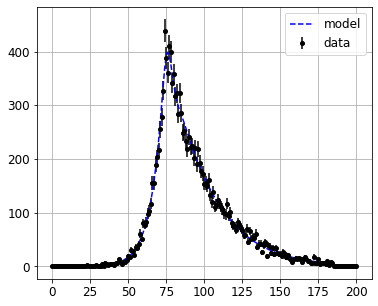

In [69]:
fchi2 = us.res(xdata, ufun = ufun)
xpars = usa.fit_setpars(pars, (T0, Beta, Gamma, TR), mask)
parshat = usa.fit_ana(fchi2, xpars, pars, mask)
usa.plot_fit_data(xdata, parshat, ufun = ufun)

true (15, 0.6, 0.16, 5.0, 5.5, 1000000.0, 0.1, 0.05) , guess  [1.0e+01 6.0e-01 1.6e-01 5.0e+00 5.5e+00 1.0e+06 1.0e-01 5.0e-02] , best  [1.00140178e+01 6.56846468e-01 1.65387661e-01 4.83504171e+00
 5.50000000e+00 1.00000000e+06 1.00000000e-01 5.00000000e-02]
f best  19902.551442157106 , f true  19360.900318675012 , f delta  -541.6511234820937


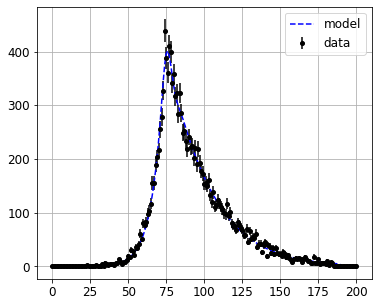

In [70]:
fchi2 = us.res(xdata, ufun = ufun)
xpars = usa.fit_setpars(pars, (T0 - 5, Beta, Gamma, TR), mask)
parshat = usa.fit_ana(fchi2, xpars, pars, mask)
usa.plot_fit_data(xdata, parshat, ufun = ufun)

## Conclusions

- There is still a correlation between beta and TR.

- There is a strong correlation betting T0 and beta, TR, which tend to absorbs the value of T0. The model fits "nicely" the data. 

- Probe with an iterative method, providing 'reasonable' inputs

- Consider the possibility to use another minimize engine